# Predicting NBA shots

- projekt na kolegiju Uvod u znanost o podacima


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Opis skupa podataka

In [22]:
orig_dataset = pd.read_csv('shot_logs.csv')
print(orig_dataset.shape)
orig_dataset.columns.values

(128069, 21)


array(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN',
       'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES',
       'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id'], dtype=object)

Početni skup podataka sadrži 128 069 redaka i 21 stupac. Svaki redak predstavlja
jedan pokušaj šuta, a opisan je značajkama čija su imena ispisana u odjeljku iznad. Podaci
se odnose na NBA ligu, sezona 2014/2015.

Uvid u podatke može se dobiti naredbom `head`, koja ispisuje prvih 5 redaka tablice.

In [23]:
orig_dataset.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


Pojašnjenja nekih značajki:
- 'GAME_ID' - identifikator utakmice
- 'MATCHUP' - oznaka utakmice; sadrži datum i oznake suprotstavljenih ekipa
- 'LOCATION' - označava nastupa li igrač za domaću ili gostujuću ekipu
- 'W' - pobjeda ili poraz
- 'FINAL_MARGIN' - koš razlika na kraju utakmice
- 'SHOT_NUMBER' - redni broj šuta
- 'PERIOD' - četvrtina
- 'GAME_CLOCK' - vrijeme proteklo od početka četvrtine
- 'SHOT_CLOCK' - vrijeme preostalo do kraja napada
- 'DRIBBLES'
- 'TOUCH_TIME'
- 'SHOT_DIST' - udaljenost do koša
- 'PTS_TYPE' - vrsta šuta (za 2 ili 3 poena)
- 'SHOT_RESULT' - pogodak ili promašaj
- 'CLOSEST_DEFENDER' - najbliži igrač u obrani
- 'CLOSEST_DEFENDER_PLAYER_ID'
- 'CLOSE_DEF_DIST' - udaljenost od najbližeg obrambenog igrača
- 'FGM'
- 'PTS' - osvojeni poeni
- 'player_name'
- 'player_id'


Sljedeći je korak provjera nedostajućih vrijednosti.

In [24]:
orig_dataset.isna().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

Mali dio podataka iz stupca 'SHOT_CLOCK' sadrži nepoznate vrijednosti.
One ne mogu biti zamijenjene artimetičkom sredinom zbog
njihovog značenja (vrijeme), a ima dovoljno poznatih podataka da se ne
odbaci cijeli stupac. Najbolje je rješenje odbaciti retke koji sadrže
nepoznate vrijednosti.

In [25]:
orig_dataset.dropna(inplace=True)
orig_dataset.shape

(122502, 21)

U skupu podataka ostala su 122 502 retka.

Sada se mogu detaljnije proučiti pojedine značajke - njihove distribucije,
vrsta (numerička/kategorijska) i sl.

Metoda `describe` vraća skupnu statistiku za dani DataFrame. Budući da se
rezultati razlikuju za numeričke i kategorijske varijable, u sljedećem
odjeljku metoda se poziva za svaki stupac zasebno.

In [26]:
for col in orig_dataset.columns:
    print(orig_dataset[col].describe())
    print()

count    1.225020e+05
mean     2.140045e+07
std      2.578228e+02
min      2.140000e+07
25%      2.140023e+07
50%      2.140045e+07
75%      2.140067e+07
max      2.140091e+07
Name: GAME_ID, dtype: float64

count                         122502
unique                          1792
top       FEB 07, 2015 - DAL vs. POR
freq                             102
Name: MATCHUP, dtype: object

count     122502
unique         2
top            A
freq       61315
Name: LOCATION, dtype: object

count     122502
unique         2
top            W
freq       62149
Name: W, dtype: object

count    122502.000000
mean          0.252396
std          13.311418
min         -53.000000
25%          -8.000000
50%           1.000000
75%           9.000000
max          53.000000
Name: FINAL_MARGIN, dtype: float64

count    122502.000000
mean          6.476164
std           4.681245
min           1.000000
25%           3.000000
50%           5.000000
75%           9.000000
max          37.000000
Name: SHOT_NUMBER, d

### GAME_ID, MATCHUP, CLOSEST_DEFENDER, CLOSEST_DEFENDER_PLAYER_ID, player_name, player_id
Na tri mjesta može se pretpostaviti savršena koreliranost značajki, budući da
jedna kodira drugu:
 - GAME_ID i MATCHUP
 - CLOSEST_DEFENDER i CLOSEST_DEFENDER_PLAYER_ID
 - player_name i player_id.

U ovom slučaju deskriptivna statistika značajki koje označavaju identifikator
(s nastavkom '_id') nema smisla. Uzrok je neprikladan tip podataka - te su
značajke spremljene kao numeričke, a ne kategoričke.

Međutim, iz dobivenih rezultata vidi se da skup sadrži podatke iz 1792
različite utakmice. Od 281 igrača koji su uputili šut prema košu, najviše
pokušaja od svih imao je LaMarcus Aldridge (ukupno 1010). Igrač koji je
najviše puta bio najbliži obrambeni igrač šutera suprotne ekipe je Serge Ibaka.


### Jednostavnije kategorijske značajke

U ovu skupinu svrstane su značajke koje imaju samo nekoliko različitih vrijednosti:
`LOCATION`, `W`, `PERIOD`, `PTS_TYPE`, `SHOT_RESULT`, `PTS`.

Budući da Python nema poseban tip za kategoričke varijable, potrebno je
napraviti preslikavanje znakovnih varijabli u numeričke (`LOCATION`, `W`,
`SHOT_RESULT`) koristeći LabelEncoder.


In [27]:
from sklearn.preprocessing import LabelEncoder

# pretvaranje kategorijskih značajki iz tekstualnog u numericki oblik
for col in  ['LOCATION', 'W', 'SHOT_RESULT']:
    le = LabelEncoder()
    le.fit(orig_dataset.loc[:,col])

    orig_dataset.loc[:,col] = le.transform(orig_dataset.loc[:,col])

orig_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122502 entries, 0 to 128067
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     122502 non-null  int64  
 1   MATCHUP                     122502 non-null  object 
 2   LOCATION                    122502 non-null  int32  
 3   W                           122502 non-null  int32  
 4   FINAL_MARGIN                122502 non-null  int64  
 5   SHOT_NUMBER                 122502 non-null  int64  
 6   PERIOD                      122502 non-null  int64  
 7   GAME_CLOCK                  122502 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    122502 non-null  int64  
 10  TOUCH_TIME                  122502 non-null  float64
 11  SHOT_DIST                   122502 non-null  float64
 12  PTS_TYPE                    122502 non-null  int64  
 13  SHOT_RESULT   

Sada se može pokazati udio različitih vrijednosti za svaku od gore navedenih značajki.

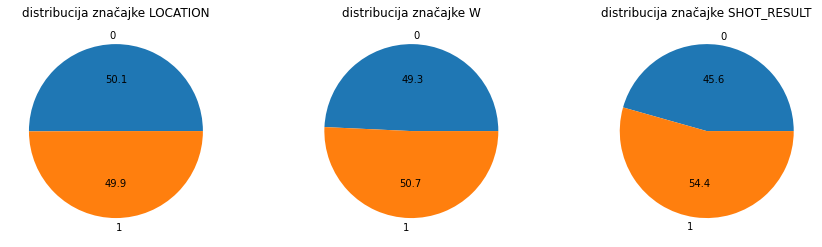

In [28]:
i = 1
plt.figure(figsize=(15,4))

for col in  ['LOCATION', 'W', 'SHOT_RESULT']:
    count_per_col = orig_dataset.groupby(col).count().iloc[:, 0].values
    title_name = orig_dataset.groupby(col).count().index.values

    # crtanje grafa
    plt.subplot(1,3,i)
    plt.pie(count_per_col, labels=title_name, autopct='%.1f')
    plt.title(f'distribucija značajke {col}')
    i += 1

plt.show()

U skupu podataka nema više nedostajućih vrijednosti, a ostale su samo još
četiri varijable tipa *object*. Budući da za tri od njih postoje pripadni
identifikatori numeričkog tipa, potrebno je transformirati samo još jednu
značajku - `GAME_CLOCK`.

### Transformacija značajke GAME_CLOCK

Iz prethodno napravljenog ispisa vidi se da stupac sadrži 718 različitih
vrijendosti. To ne govori puno o podatcima, stoga treba pogledati koje sve
vrijednosti poprima ta značajka.
Budući da ima puno različitih vrijednosti, ispis će sadržavati samo nekoliko
mogućnosti.

In [29]:
orig_dataset['GAME_CLOCK'].unique()[:50]

array(['1:09', '0:14', '11:47', '10:34', '8:15', '10:15', '8:00', '5:14',
       '11:32', '6:30', '8:55', '9:10', '0:48', '10:38', '8:27', '10:55',
       '10:29', '3:35', '0:33', '8:50', '8:24', '5:32', '10:13', '5:34',
       '2:25', '9:08', '8:53', '11:37', '1:18', '9:34', '11:34', '8:08',
       '8:46', '7:19', '10:58', '7:52', '1:33', '0:25', '5:58', '5:21',
       '4:22', '0:31', '9:18', '5:19', '5:05', '2:31', '1:01', '0:32',
       '5:40', '2:50'], dtype=object)

Poznato je da četvrtina u NBA ligi traje 12 minuta. U prethodnom ispisu nema
vrijednosti većih od 12 minuta, stoga pri transformaciji treba uzeti u obzir
i period u kojem je ostvaren pokušaj šuta.

Transformirani stupac označavat će broj sekundi proteklih od početka utakmice.

In [30]:
new_col = []
for row in orig_dataset.itertuples(index=False):
    time_list = row[7].split(':')
    min = int(time_list[0])
    sec = int(time_list[1])
    period = row[6]
    new_col.append(min*60 + sec + (period - 1)*12*60)

orig_dataset['GAME_CLOCK'] = new_col

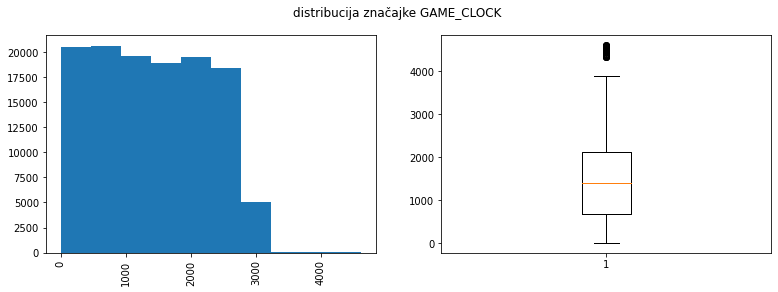

In [31]:
g_clock_df = orig_dataset['GAME_CLOCK']
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.hist(g_clock_df)
plt.xticks(rotation=90)
plt.subplot(122)
plt.boxplot(g_clock_df)
plt.suptitle('distribucija značajke GAME_CLOCK')
plt.show()

Distribucija značajke `GAME_CLOCK` približno je uniformna.
Lako se izračuna da regularni dio utakmice traje 2880 sekundi. Na histogramu
se vidi da postoje i podaci izvan regularnog vremena. Ako bi oni bili
uklonjeni, distribucija bi bila još bliža uniformnoj.

Sljedeći grafovi to pokazuju, ali u nastavku analize neće se koristiti taj podskup.

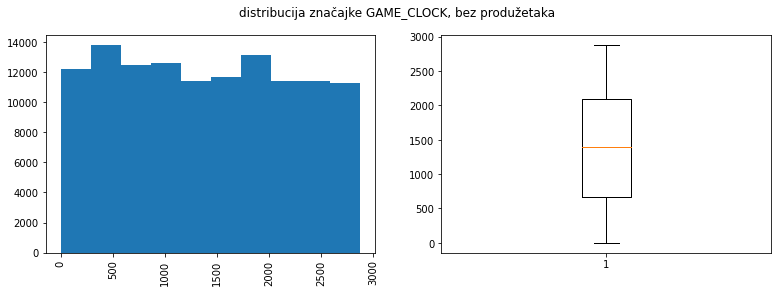

In [32]:
g_clock_df_no_extras = g_clock_df[g_clock_df <= 2880]
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.hist(g_clock_df_no_extras)
plt.xticks(rotation=90)
plt.subplot(122)
plt.boxplot(g_clock_df_no_extras)
plt.suptitle('distribucija značajke GAME_CLOCK, bez produžetaka')
plt.show()

### Kontinuirane značajke

Još treba pogledati distribucije značajki `SHOT_NUMBER`, `SHOT_DIST` i
`CLOSE_DEF_DIST`.

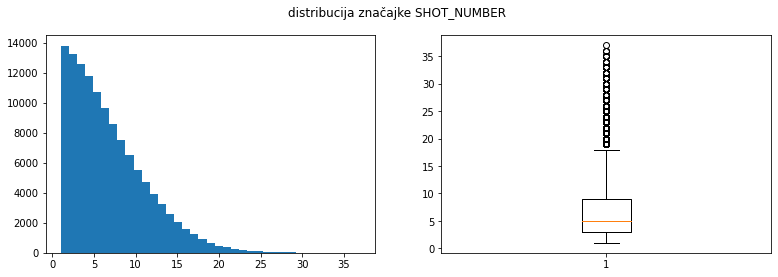

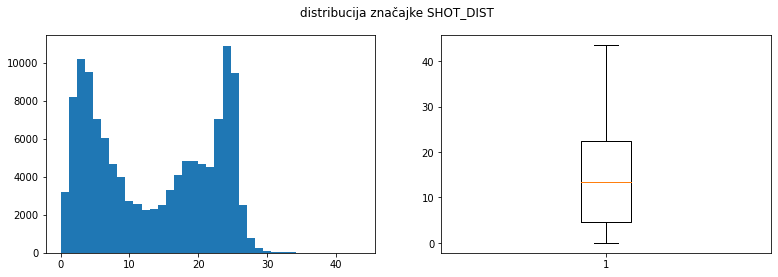

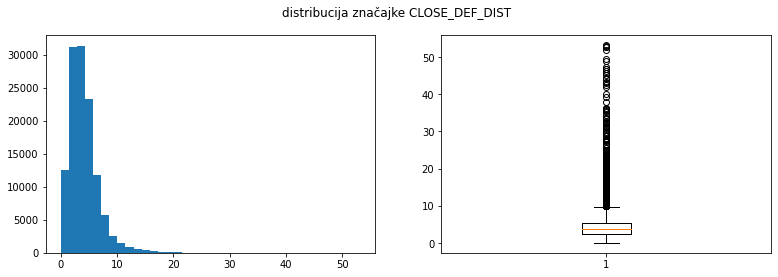

In [33]:
for x in ['SHOT_NUMBER', 'SHOT_DIST', 'CLOSE_DEF_DIST']:
    plt.figure(figsize=(13,4))
    plt.subplot(121)
    plt.hist(orig_dataset[x], bins=37)
    #plt.xticks(rotation=90)
    plt.subplot(122)
    plt.boxplot(orig_dataset[x])
    plt.suptitle(f'distribucija značajke {x}')
    plt.show()

Iz nacrtanih grafova vidi se sljedeće:

1) Najviše igrača uputilo je barem 1 šut prema košu. U svakoj sljedećoj grupi
ima sve manje zapisa, što je i očekivano. Na primjer svatko tko je imao tri pokušaja,
prije toga imao je prvi i drugi pokušaj.

2) Značajka `SHOT_DIST` ima bimodalnu distribuciju - najviše šuteva upućeno
je s udaljenosti od oko 5ft i 25ft od koša. Prvi vrh distribucije je na maloj
udaljenosti od koša (~5ft) jer je tamo najlakše postići pogodak. Drugi vrh
može se objasniti ako se u obzir uzme vrijednost pojedinog šuta. Ima puno
pokušaja s 25ft jer s otprilike te udaljenosti pogodak vrijedi 3 poena
([vidi sliku](https://sportsknowhow.com/wp-content/uploads/2015/03/basketball-NBA-court-dimensions-diagram-lrg.gif)).

3) U najviše slučajeva kada je lopta bačena prema košu, u blizini (do 10ft) nalazio
se neki obrambeni igrač suprotne ekipe. To odgovara tijeku igre jer se
najviše napada odigra na postavljenu obranu, a samo u malom broju slučajeva
napadač je sam u prilici za šut.

## Koreliranost značajki

Kako bi se na temelju podataka mogao napraviti dobar model, potrebno je
provjeriti ima li koreliranih značajki.

U nastavku je grafički prikaz korelacijske matrice svih numeričkih varijabli.

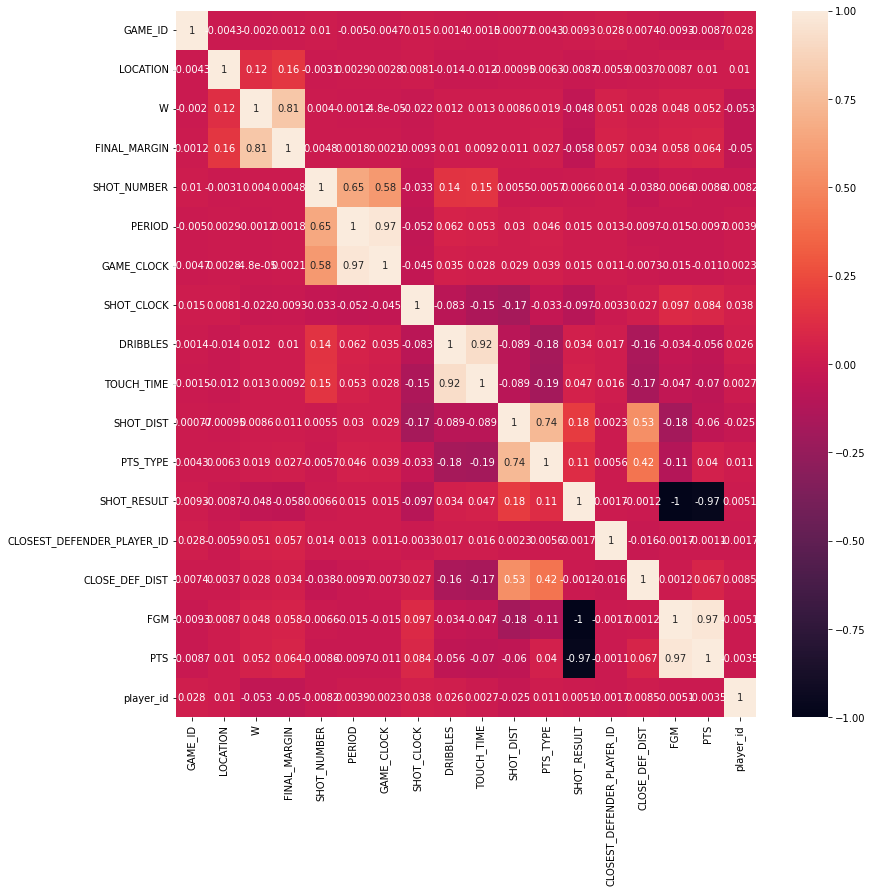

In [34]:
corrMatrix = orig_dataset.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corrMatrix, annot=True)
plt.show()


Značajke `PGM` i `PTS` negativno su korelirane sa značajkom `SHOT_RESULT`
pa ih je potrebno izbaciti iz skupa podataka s kojim će raditi modeli.

Osim toga, postoji relativno velika koreliranost između sljedećih
kombinacija značajki:
- `W` i `FINAL_MARGIN` (r = 0.81)
- `PERIOD` i `GAME_CLOCK` (r = 0.97)
- `PERIOD` i `GAME_CLOCK` u odnosu na `SHOT_NUMBER` (r = 0.65 i r = 0.58)
- `DRIBBLES` i `TOUCH_TIME` (r = 0.92)
- `SHOT_DIST` i `PTS_TYPE` (r = 0.74)

Može se napraviti usporedba modela treniranih s različitim podskupovima
značajki i usporediti njihove rezultate.

U prvom skupu uklonjene su samo
prve dvije spomenute značajke (`PGM` i `PTS`). U drugom skupu podataka
dodatno su uklonjene i značajke `FINAL_MARGIN`, `PERIOD`, `SHOT_NUMBER`,
`TOUCH_TIME` i `PTS_TYPE`.

In [35]:
df = orig_dataset.drop(columns=['FGM', 'PTS'])
df_smaller = orig_dataset.drop(columns=['FGM', 'PTS', 'FINAL_MARGIN', 'PERIOD',
                                        'SHOT_NUMBER', 'TOUCH_TIME', 'PTS_TYPE'])

Sada su podatkovni skupovi spremni za korištenje u modelima. Prije sljedećeg
koraka ispisani su stupci obaju skupova podataka za usporedbu.

In [36]:
print(f'df.columns: {df.columns.values} (uk. {len(df.columns)} značajki)\n')
print(f'df_smaller.columns: {df_smaller.columns.values} (uk. {len(df_smaller.columns)} značajki)')

df.columns: ['GAME_ID' 'MATCHUP' 'LOCATION' 'W' 'FINAL_MARGIN' 'SHOT_NUMBER' 'PERIOD'
 'GAME_CLOCK' 'SHOT_CLOCK' 'DRIBBLES' 'TOUCH_TIME' 'SHOT_DIST' 'PTS_TYPE'
 'SHOT_RESULT' 'CLOSEST_DEFENDER' 'CLOSEST_DEFENDER_PLAYER_ID'
 'CLOSE_DEF_DIST' 'player_name' 'player_id'] (uk. 19 značajki)

df_smaller.columns: ['GAME_ID' 'MATCHUP' 'LOCATION' 'W' 'GAME_CLOCK' 'SHOT_CLOCK' 'DRIBBLES'
 'SHOT_DIST' 'SHOT_RESULT' 'CLOSEST_DEFENDER' 'CLOSEST_DEFENDER_PLAYER_ID'
 'CLOSE_DEF_DIST' 'player_name' 'player_id'] (uk. 14 značajki)


# Modeliranje problema

## 1) Logistička regresija

U prvom dijelu koristi se model logističke regresije za klasifikaciju.

Treba ukloniti kategorijske značajke s više od dvije moguće kategorije
(`GAME_ID`, `MATCHUP`, `CLOSEST_DEFENDER`, `CLOSEST_DEFENDER_PLAYER_ID`,
`player_name`, `player_id`), a zatim normalizirati sve kontinuirane varijable.
Prije normalizacije, treba izdvojiti značajku `SHOT_RESULT` jer je to ciljna
varijabla u ovoj analizi.

Transformacije nad skupom podataka obavljaju se jednako nad manjim i većim
podskupom.

In [37]:
lr_df = df.drop(columns=['GAME_ID', 'MATCHUP', 'CLOSEST_DEFENDER',
                         'CLOSEST_DEFENDER_PLAYER_ID', 'player_name', 'player_id'])

lr_df_smaller = df_smaller.drop(columns=['GAME_ID', 'MATCHUP', 'CLOSEST_DEFENDER',
                         'CLOSEST_DEFENDER_PLAYER_ID', 'player_name', 'player_id'])

print(f'df.columns: {lr_df.columns.values} (uk. {len(lr_df.columns)} značajki)\n')
print(f'df_smaller.columns: {lr_df_smaller.columns.values} (uk. {len(lr_df_smaller.columns)} značajki)')

y = lr_df['SHOT_RESULT']
y_smaller = lr_df_smaller['SHOT_RESULT']

lr_df.drop(columns='SHOT_RESULT', inplace=True)
lr_df_smaller.drop(columns='SHOT_RESULT', inplace=True)

df.columns: ['LOCATION' 'W' 'FINAL_MARGIN' 'SHOT_NUMBER' 'PERIOD' 'GAME_CLOCK'
 'SHOT_CLOCK' 'DRIBBLES' 'TOUCH_TIME' 'SHOT_DIST' 'PTS_TYPE' 'SHOT_RESULT'
 'CLOSE_DEF_DIST'] (uk. 13 značajki)

df_smaller.columns: ['LOCATION' 'W' 'GAME_CLOCK' 'SHOT_CLOCK' 'DRIBBLES' 'SHOT_DIST'
 'SHOT_RESULT' 'CLOSE_DEF_DIST'] (uk. 8 značajki)


In [38]:
lr_df.head()



,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,0,1,24,1,1,69,10.8,2,1.9,7.7,2,1.3
1,0,1,24,2,1,14,3.4,0,0.8,28.2,3,6.1
3,0,1,24,4,2,1427,10.3,2,1.9,17.2,2,3.4
4,0,1,24,5,2,1354,10.9,2,2.7,3.7,2,1.1
5,0,1,24,6,2,1215,9.1,2,4.4,18.4,2,2.6
